In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
from glob import glob

import cftime
import numpy as np
import xarray as xr

import matplotlib.pyplot as plt

import util
import oae_smyle

In [19]:
caselist = [
    'smyle-fosi.lat-range-basin.alk-forcing-lat-range-basin.000',
]

dsets = {}
member_ids = []
for case in caselist[:1]:
    member_id = case.split('.')[-1]
    dsets[member_id] = oae_smyle.open_dataset(
        case=case,
        stream='pop.h',
    )
    member_ids.append(member_id)
    
dsets

{'000': <xarray.Dataset>
 Dimensions:                          (time: 60, d2: 2, moc_comp: 3, transport_comp: 5, transport_reg: 2, z_t: 60, z_t_150m: 15, z_w: 60, z_w_top: 60, z_w_bot: 60, lat_aux_grid: 395, moc_z: 61, nlat: 384, nlon: 320)
 Coordinates: (12/15)
     transport_components             (transport_comp) |S384 dask.array<chunksize=(5,), meta=np.ndarray>
     transport_regions                (transport_reg) |S384 dask.array<chunksize=(2,), meta=np.ndarray>
   * time                             (time) object 0347-01-16 12:00:00 ... 03...
   * z_t                              (z_t) float32 500.0 1.5e+03 ... 5.375e+05
   * z_t_150m                         (z_t_150m) float32 500.0 ... 1.45e+04
   * z_w                              (z_w) float32 0.0 1e+03 ... 5e+05 5.25e+05
     ...                               ...
   * moc_z                            (moc_z) float32 0.0 1e+03 ... 5.5e+05
     TLONG                            (nlat, nlon) float64 320.6 321.7 ... 319.8
     TLAT

In [32]:
%%time
add_co2 = {}
for key, ds in dsets.items():
    add_co2[key] = oae_smyle.compute_additional_DIC_global_ts(ds).compute()

add_co2

CPU times: user 605 ms, sys: 101 ms, total: 706 ms
Wall time: 4.35 s


{'000': <xarray.DataArray (time: 60)>
 array([5.29947507e+11, 1.26905593e+12, 1.88471608e+12, 2.35796049e+12,
        2.77652778e+12, 3.11257528e+12, 3.44248631e+12, 3.71094183e+12,
        3.94156269e+12, 4.15572236e+12, 4.34654140e+12, 4.53980641e+12,
        4.71765284e+12, 4.87335116e+12, 5.02595249e+12, 5.15958870e+12,
        5.28895099e+12, 5.41813102e+12, 5.54506219e+12, 5.66609518e+12,
        5.77265547e+12, 5.87368769e+12, 5.96624743e+12, 6.06577332e+12,
        6.16020639e+12, 6.24073270e+12, 6.31831622e+12, 6.38947692e+12,
        6.45488525e+12, 6.52264683e+12, 6.59369479e+12, 6.66309127e+12,
        6.72131478e+12, 6.77701767e+12, 6.83172021e+12, 6.88958020e+12,
        6.94697920e+12, 6.99473997e+12, 7.04395356e+12, 7.08503433e+12,
        7.12700641e+12, 7.17128112e+12, 7.21768836e+12, 7.26239378e+12,
        7.30050979e+12, 7.33712578e+12, 7.37506379e+12, 7.41289603e+12,
        7.45183406e+12, 7.48462649e+12, 7.51571973e+12, 7.54393463e+12,
        7.57277429e+12, 7.

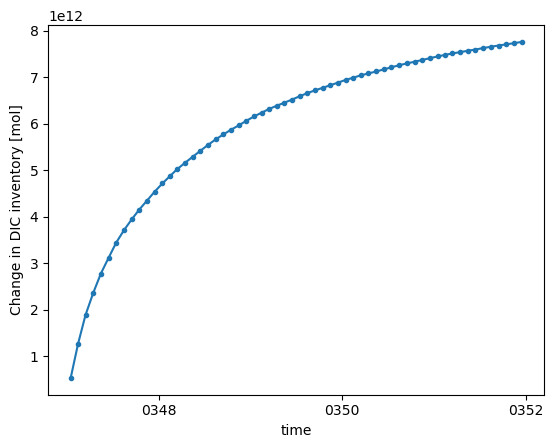

In [33]:
add_co2[member_ids[0]].plot(marker='.')

In [34]:
%%time
dic_inv = ((ds.DIC - ds.DIC_ALT_CO2) * ds.dz * ds.TAREA).sum(['z_t', 'nlat', 'nlon']) * 1e-9
dic_inv = dic_inv.compute()
dic_inv

CPU times: user 6.71 s, sys: 4.43 s, total: 11.1 s
Wall time: 13.6 s


<xarray.DataArray (time: 60)>
array([1.88187487e+11, 9.23696451e+11, 1.57867615e+12, 2.13020297e+12,
       2.56827257e+12, 2.94598682e+12, 3.27875557e+12, 3.57751527e+12,
       3.82489075e+12, 4.04491120e+12, 4.24832710e+12, 4.44195201e+12,
       4.62322200e+12, 4.79083192e+12, 4.94665993e+12, 5.08740892e+12,
       5.21821692e+12, 5.34809706e+12, 5.47726204e+12, 5.59964285e+12,
       5.71311330e+12, 5.81683328e+12, 5.91130948e+12, 6.00890875e+12,
       6.10570359e+12, 6.19484345e+12, 6.27356418e+12, 6.34717915e+12,
       6.41459180e+12, 6.48011308e+12, 6.55062160e+12, 6.62147925e+12,
       6.68381590e+12, 6.74174535e+12, 6.79619835e+12, 6.85292121e+12,
       6.90964677e+12, 6.96344821e+12, 7.01101454e+12, 7.05641310e+12,
       7.09846547e+12, 7.14018266e+12, 7.18657928e+12, 7.23227838e+12,
       7.27337517e+12, 7.31148385e+12, 7.34785306e+12, 7.38578415e+12,
       7.42401031e+12, 7.46025373e+12, 7.49290331e+12, 7.52208314e+12,
       7.54993980e+12, 7.57846296e+12, 7.60732377e+12, 7.63763721e+12,
       7.66570865e+12, 7.69143211e+12, 7.71601497e+12, 7.74258893e+12])
Coordinates:
  * time        (time) object 0347-01-16 12:00:00 ... 0351-12-16 12:00:00
    time_delta  (time) float64 31.0 28.0 31.0 30.0 31.0 ... 30.0 31.0 30.0 31.0

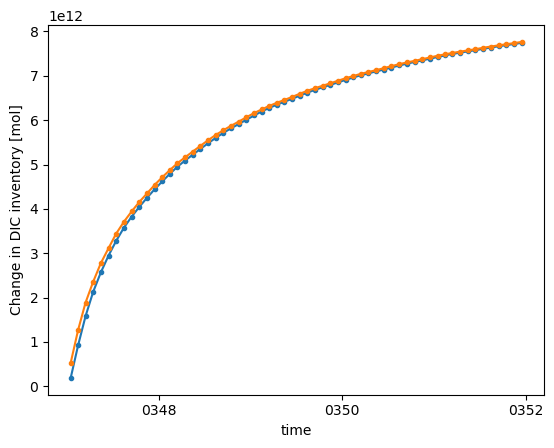

In [35]:
dic_inv.plot(marker='.')
add_co2[member_ids[0]].plot(marker='.')